<a href="https://colab.research.google.com/github/JhowSantiago/Classificacao_de_Sentimentos_em_texto_com_Redes_Neurais_Convolucionais/blob/main/Classifica%C3%A7%C3%A3o_de_Sentimentos_com_Redes_Neurais_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importando as bibliotecas

In [2]:
#biblioteca cientifica do python
import numpy as np
#biblioteca para recurso matematico
import math
#biblioteca para trabalhar com expressoes regulares
import re
#biblioteca para trabalhar com as bases de dados
import pandas as pd
#biblioteca utiliza para fazer pre processamento em texto
from bs4 import BeautifulSoup
#para ter acesso aos recursos do dooble drive
from google.colab import drive
#para acesso e descompactaÇão de arquivos zip
import zipfile
#para visualização de gráficos
import seaborn as sns
#biblioteca para processamento de linguagem natural
import spacy as sp
#para pre processamento de textos
import string
#para numeros aleatorios
import random
#para fazer a geração de gráficos
import matplotlib.pyplot as plt

In [3]:
#importação para o tensorflow
%tensorflow_version 2.x

#importando o tensor flow
import tensorflow as tf

#comando para visualizar a versão que esta sendo utilizada do tensorflow
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [4]:
#importação para o tensorflow
%tensorflow_version 2.x

#importando o tensor flow
import tensorflow as tf

#comando para visualizar a versão que esta sendo utilizada do tensorflow
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [5]:
#importações para ter acesso a alguns recursos do tensorflow
from tensorflow.keras import layers
#utilizar para o pre processamento
import tensorflow_datasets as tfds

# Etapa 2: Pré-processamento dos dados

## Carregamentos dos arquivos



In [6]:
#montando o drive do google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#depois de baixar o arquivo trainingandtestdata.zip iremos criar uma variavel para ter o caminho
path = '/content/drive/My Drive/trainingandtestdata.zip'

#descompactar o arquivo.zip
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [8]:
#criando as colunas que temos na base de dados
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [9]:
#fazendo o carregamento da base de dados de train
train_data = pd.read_csv('/content/trainingandtestdata/train.csv',
                         #tirando o cabecalho
                         header = None,
                         #vai receber as colunas que decidimos
                         names = cols,
                         #fazendo o carregamento utilizando a engine do python
                         engine = 'python',
                         #configuracao da base de dados
                         encoding = 'latin1')


In [10]:
#visualiar a quantidade de registros e colunas
train_data.shape

(1600000, 6)

In [11]:
#visualizar o comeco do dataset
train_data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
#visualizar os ultimos registro
train_data.tail()

,sentiment,id,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [13]:
#contagem de registro que tem em sentiment
train_data.sentiment.unique()

array([0, 4])

In [14]:
#contagem das ocorrencia
print(train_data['sentiment'].value_counts())

0    800000
4    800000
Name: sentiment, dtype: int64


<Axes: xlabel='sentiment', ylabel='Count'>

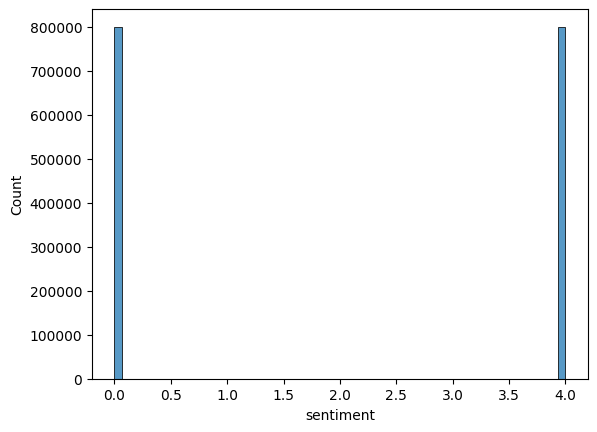

In [15]:
#mostrar um grafico das contagem de ocorrencia dos sentimentos
# Criação do gráfico de contagem
sns.histplot(train_data.sentiment)

In [16]:
#fazendoo carregamento da base de dados de teste
test_data = pd.read_csv("/content/trainingandtestdata/test.csv",
                        header=None,
                        names=cols,
                        engine="python",
                        encoding="latin1")

In [17]:
#visualiar a quantidade de registros e colunas
test_data.shape

(498, 6)

In [18]:
#visualizar o comeco do dataset
test_data.head()

,sentiment,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [19]:
#visualizar os ultimos registro
test_data.tail()

,sentiment,id,date,query,user,text
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
497,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


In [20]:
test_data.shape

(498, 6)

In [21]:
#contagem de registro que tem em sentiment
test_data.sentiment.unique()

array([4, 0, 2])

In [22]:
#contagem das ocorrencia
print(test_data['sentiment'].value_counts())

4    182
0    177
2    139
Name: sentiment, dtype: int64


<Axes: xlabel='sentiment', ylabel='Count'>

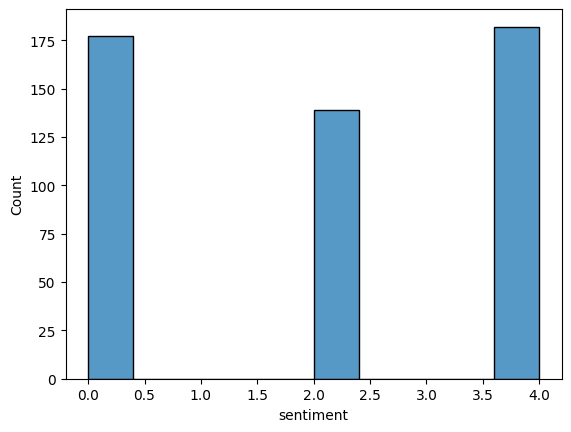

In [23]:
#mostrar um grafico das contagem de ocorrencia dos sentimentos
# Criação do gráfico de contagem
sns.histplot(test_data.sentiment)

## Pré-processamento

### Limpeza

In [24]:
#passando o dataset train_data para a variavel data
data = train_data

In [25]:
#apagar colunas que nao iremos utilizar do data set
data.drop(['id', 'date', 'query', 'user'], axis = 1, inplace=True)


In [26]:
#mostrando como fica
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [27]:
#variavel para armazenar os textos
X = data.iloc[:, 1].values
#visualizando o que tem na variavel
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [28]:
#verificando a quantidade de registros
X.shape

(1600000,)

In [29]:
#verificando o tipo da variavel x que precisa estar no formato numpy.ndarray
type(X)

numpy.ndarray

In [30]:
#variavel para armazenar os sentimentos
y = data.iloc[:, 0].values
#visualizando o que tem na variavel
y

array([0, 0, 0, ..., 4, 4, 4])

In [31]:
#retirando 85% dos registros da base de dados pois ela e mt grande
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.85, stratify = y)

In [32]:
#visualizando a quantidade de registros que sobrou
X.shape

(240000,)

In [33]:
#visualizando a quantidade de registros que sobrou
y.shape

(240000,)

In [34]:
#criando 2 variavel que vao receber os tipos que aparecem em y e a quantidade de ocorrencia de cada um
unique, counts = np.unique(y, return_counts=True)
#mostrando
unique, counts

(array([0, 4]), array([120000, 120000]))

In [35]:
#nlp = natural_language_proces (processo de linguagem natural)
#variavel vai receber a importacao para o spacy(biblioteca)e como estamos trabalhando com ingles 'en'
#esse codigo carrega um modelo que ja foi treinado com o idioma ingles
nlp = sp.blank('en')
nlp

In [36]:
#dentro da biblioteca spacy ja possui recursos de stop_word definidos
stop_words = sp.lang.en.STOP_WORDS

In [38]:
#quantidade de palavras removidas do texto
len(stop_words)

326

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
#criando uma funcao para limpar tweets
def clean_tweets(tweet):
  #BeautifulSoup serve para acesso e pré-processamento
  #lxml e utilizado quando temos dados com links etc
  tweet = BeautifulSoup(tweet, 'lxml').get_text()

  #retirando o @ utilizando a expressao r"@[A-Za-z0-9]" e substituindo por um espaco em branco e no final colocamos a variavel
  #com isso iremos retirar todo o texto que e acompanhado de @ pois nao e do interesse
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)

  #retirando links
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)

  #retirando os numeros para conter apenas palavras e alguns sinais uteis para identificao de sentimentos
  tweet = re.sub(r"[^a-zA-Z.!?]", ' ', tweet)

  #retirando os espacos de sobra apos a retirada dos elementos anterior
  tweet = re.sub(r" +", ' ', tweet)

  return tweet


In [41]:
def clean_tweets2(tweet):
  #transformando os tweet em letras minusculas
  tweet = tweet.lower()

  #toda vez que fizermos um processamento em algum texto utilizando o spacy precisamos criar um novo objeto recebendo o nlp
  document = nlp(tweet)

  words = []
  for token in document:
    words.append(token.text)

  #removendo as palavras stop_words do texto
  words = [word for word in words if word not in stop_words and word not in string.punctuation]

  #tirando do formando de lista e deixando no formato de string
  words = ' '.join([str(element) for element in words])

  return words

In [42]:
#texto referencia para verificar se a funcao esta funcionando corretamente
#texto referencia para verificar se esta correta a funcao clean_tweets
text = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D"

In [43]:
#texto referencia para verificar se a funcao esta funcionando corretamente
# Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D

In [44]:
#chamando a funcao para limpar os dados que nao iremos utilizar dos tweets
text = clean_tweets(text)
text

<ipython-input-40-16633a77c970>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


' Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D'

In [45]:
text2 = clean_tweets2(text)
text2

'  awww s bummer shoulda got david carr day d'

In [46]:
#criando a variavel que vai receber os dados da base de dados limpos e passando para a funcao clea_tweets
#Para cada tweet presente na lista x, a função clean_tweets(tweet) é chamada e retorna um resultado que sera passado para funcao clean_tweets2
data_clean = [clean_tweets2(clean_tweets(tweet)) for tweet in X]

<ipython-input-40-16633a77c970>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


In [47]:
#imprimindo frases aleatorias apos o fazer a limpeza para verificar se esta
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

hug mommas miles away
ok admit crush u lol
  yep m glad jericho won match r truth night
got juanita s. sorry aidan
  omg don t think m sorry
  rainy walse
  hope hot sauce
relaxing home days week half work ahead
hate paying taxes
 


In [48]:
#colocando os valores das classes para a uma nova variavel
data_labels = y

In [49]:
#substituindo os valores 4 existentes na label por 1
data_labels[data_labels == 4] = 1

In [50]:
data_labels

array([1, 0, 0, ..., 1, 0, 1])

In [51]:
#verificando se a troca foi sucessidad
np.unique(data_labels)

array([0, 1])

## Tokenização


In [52]:
#esse opercao vai ser a deficao do limite do vocalubario maximo
2**16

65536

In [53]:
import math
math.pow(2, 16)

65536.0

**tfds.deprecated.text.SubwordTextEncoder:**
Classe TensorFlow para tokenização de texto em subpalavras, permitindo representar palavras fora do vocabulário.

**build_from_corpus(data_clean, target_vocab_size**=2**16):
Método que cria um tokenizer de subpalavras a partir de um corpus (data_clean), com limite de vocabulário de 65536 subpalavras.

In [54]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [55]:
#verificando o tamnho do vocabulario
tokenizer.vocab_size

52910

In [57]:
#essa tokenização gera ids para cada uma das palavras
#utilizacao uma palavra de exemplo para verificar
ids = tokenizer.encode("i am happy")
ids

[271, 3568, 385]

In [58]:
#faz o inverso do encode
text = tokenizer.decode(ids)
text

'i am happy'

In [59]:
#Percorrendo cada uma das frases da variavel data_clean e aplicando a tokenizaÇão
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [60]:
#imprimindo frases aleatorias apos o encode
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[487, 431]
[1, 172]
[25, 11, 357, 1808, 532, 51, 2, 9, 637, 99, 262, 5649]
[208, 2678, 374]
[1, 1014, 736, 743, 5364, 3896, 553, 3396]
[1, 28, 280, 6, 10, 243, 185, 2378]
[1, 35529, 654, 38088, 1746]
[1, 351, 680, 642, 27, 22, 152, 17668, 23951]
[1, 47, 187, 454, 40039, 178, 50064]
[1, 2, 634, 31, 9, 1068, 3546]


## Padding

In [61]:
#percorrendo todos os elementos da lista data_inputs e pegando o tamanho de cada uma das sentencas e pegando o valor maximo
max_len = max([len(sentence) for sentence in data_inputs])
max_len

64

In [62]:
#fazer o preenchimento das frases que tem menos palavras para deixar todas do mesmo tamanho
#estamo preechendo com value= 0, padding no final ate o tamanho maximo = max_len
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [63]:
#imprimindo frases aleatorias apos o padding
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[    3   214    66   108     4 16318 38459     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[    1 19103    99 10549     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[  221 15816  2995    16     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0

## Divisão da base de dados em treinamento e test

In [64]:
#test_size vai ser a quantidade utilizada da base de dados para fazer o rest que seria 30 e 70 que seria o resto vai ser para o treinamento
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [65]:
train_inputs[0]

array([    1, 40734,   137,  5651,  3759, 16536, 12050,  1354,     2,
        2755,  2507,     2, 20418,    53,   347,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [66]:
#quantidade de registro para treinar
train_inputs.shape

(168000, 64)

In [67]:
#quantidade de labels tem que ser igual as de registros
train_labels.shape

(168000,)

In [68]:
#registror que serao utilizados para os teste
test_inputs.shape

(72000, 64)

In [69]:
#quantidade de labels tem que ser igual as de registros
test_labels.shape

(72000,)

# Etapa 3: Construção do modelo

In [70]:
#DCNN esta herdando de tf.keras = Model que eh a classe base do keras do tensorFlow para trabalhar com construção de modelos de redes neurais
class DCNN(tf.keras.Model):
  #construtor da classe
  #self se refere a um objeto e nao a propria classe
  def __init__(self,
               #tamanho do vocabulario
               vocab_size,
               #tamanho da matriz de embedding
               emb_dim=128,
               #quantidade de filtros que vao ser usados
               nb_filters=50,
               #ffn = Feedforward neural network, units = quantidade de neurônios
               ffn_units=512,
               #2 classes positivo ou negativo
               nb_classes=2,
               #tecnica utilizada para evitar overfitting(rede neural se adaptada demais aos dados)
               #0.1 = ira zerar 10% dos neurônios
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    #chamando o metodo construtor da classe Model(criando um novo modelo)
    super(DCNN, self).__init__(name=name)

    #1 camada Embedding
    #vocab_size e emb_dim = vamos gerar uma matriz com o tamanho do vocab_size e colunas da quantidade passada pelo emb_dim
    self.embedding = layers.Embedding(vocab_size, emb_dim)

    #2 camada filtros (camada de convolução)
    #como estamos trabalhando com texto utilizamos a funcao Conv1D = o retorno vai ser 1 dimensao somente
    #filter=nb_filters = 50 filtros, kernel_size = 2 (linha)
    #padding='same' retorna os dados no mesmo formato
    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    #filter=nb_filters = 50 filtros, kernel_size = 3 (linha)
    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    #filter=nb_filters = 50 filtros, kernel_size = 4 (linha)
    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    #3 camada max pooling(Uma camada de pooling serve para simplificar a informação da camada anterior)
    #pega o maior valor que tiver dentro do vetor que foi gerado atraves do filtro que foi aplicado na matriz
    self.pool = layers.GlobalMaxPool1D()

    #4 camada estrutura dos neuronios(rede neural densa)
    #units = numero de  neurônios que iremos ter na primeira camada oculta
    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')

    #quantidade de  neurônios que ira ser zerada da camada oculta para evita evitar overfitting
    self.dropout = layers.Dropout(rate = dropout_rate)

    #camada de saida
    if nb_classes == 2:
      #ultima camada densa
      #sigmoid retorna uma probabilidade
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
    #else opcional para caso haja mais sentimentos alem de 2 classificação de emoção
    #softmax retorna uma probalidade para cada uma das classes
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    # Começamos o modelo com a camada de Embedding que vai receber os inputs.
    # Conteúdo do x será a matriz embedding.
    x = self.embedding(inputs)

    # Ligando o x com filtro bigram
    # Ligando x_1 que é a aplicação do filtro com a camada de pooling.
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)

    # Ligando o x com filtro trigram
    # Ligando x_2 que é a aplicação do filtro com a camada de pooling.
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)

    # Ligando o x com filtro fourgram
    # Ligando x_3 que é a aplicação do filtro com a camada de pooling.
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    # Após a aplicação dos filtros e dos resultados obtidos com o pooling,
    # teremos um vetor com 150 posições, pois estamos trabalhando com 50 filtros de cada tipo.
    # Próximo passo é fazer a junção dos resultados obtidos de cada pooling.
    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)

    # Passando os dados concatenados obtidos do pooling para a rede neural densa.
    merged = self.dense_1(merged)

    # Zerando uma porção dos neurônios.
    merged = self.dropout(merged, training)

    # Camada de saída.
    output = self.last_dense(merged)

    return output

Esta implementação define a arquitetura de uma CNN para processar dados de texto, usando filtros de diferentes tamanhos para capturar informações contextuais de palavras próximas. O modelo recebe uma sequência de palavras representadas como índices inteiros, que são convertidos em vetores de palavras (embedding) e, em seguida, passados por várias camadas convolucionais e densas para finalmente obter uma saída, que é a probabilidade de cada exemplo pertencer à classe positiva ou negativa, no caso de classificação binária. O modelo também é projetado para lidar com classificações com mais classes, se necessário.

# Etapa 4: Treinamento

## Configuração dos parâmetros

In [71]:
vocab_size = tokenizer.vocab_size
vocab_size#quantidade de palavras

52910

In [72]:
#tamanho do embedding
emb_dim = 200

#quantidade de filtros
nb_filters = 100

#definindo 256 neuronios da camada escondida da rede neural densa
ffn_units = 256

#quantidade de registro por vez que vai ser utilizada para o treinamento
batch_size = 64

#set vai retornar os valores unicos de train_labels
nb_classes = len(set(train_labels))
nb_classes

2

In [73]:
#para maioria dos casos valores como 0.2 eh melhor para evitar overfitting
dropout_rate = 0.2
#vou colocar 1 nas epochs se não demora muito mas o correto seria um numero maior como 5 ou 10
nb_epochs = 1

## Treinamento

In [74]:
#CRIANDO um objeto para instanciar a classe criada para construcao do modelo
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [75]:
#compilando o objeto Dcnn que possui o modelo
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#caso tivermos mais de 2 classes
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
#trabalhando com conceito de chekpoint para salvarmos o modelo apos o treinamento para caso precisarmos utilizarmos
#nao sera necessario fazer o treinamento novamente
checkpoint_path = "./"
#criando o chekpoint e passando o objeto
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored')

In [77]:
train_inputs.shape

(168000, 64)

In [79]:
history = Dcnn.fit(train_inputs, train_labels,
                   #quantidade de registro por vez que vai ser utilizada
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   #mostrar as informcoes do algoritmo enquanto ele esta em execucao
                   verbose = 1,
                   #pegando 10% dos registros para fazer a validacao dos dados
                   validation_split = 0.10)
ckpt_manager.save()

2363/2363 [==============================] - 1122s 475ms/step - loss: 0.3641 - accuracy: 0.8389 - val_loss: 0.5248 - val_accuracy: 0.7618


'./ckpt-2'

# Etapa 5: Avaliação do modelo

## Avaliação

In [80]:
#conferindo os resultados na base de dados de test
results = Dcnn.evaluate(test_inputs, test_labels, batch_size = batch_size)
print(results)

1125/1125 [==============================] - 43s 38ms/step - loss: 0.5228 - accuracy: 0.7623
[0.5227952003479004, 0.7622500061988831]


In [95]:
#realizando previsões
y_pred_test = Dcnn.predict(test_inputs)

2250/2250 [==============================] - 47s 21ms/step


In [96]:
#mostrando as previsoes para cada uma das classes
y_pred_test

array([[0.94350857],
       [0.42299324],
       [0.08909738],
       ...,
       [0.95972455],
       [0.07739276],
       [0.54570377]], dtype=float32)

In [98]:
#quanto mais proximo de zero vai ser classificado como false(0) e mais proximimo de 1 = true(1)
y_pred_test = (y_pred_test > 0.5)

In [84]:
y_pred_test

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [85]:
#respostas reais comparar com o que foi retornado na celula em cima
test_labels

array([1, 1, 0, ..., 1, 0, 1])

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm
#primeira linha classe 0 e segunda linha calsse 1
#primeiro numero que aparece na classe 0 eh a quantidade de registro classificada corretamente
#segundo numero que aparece na classe 1 eh a quantidade de registro classicada corretamente

array([[26384,  9616],
       [ 7502, 28498]])

<Axes: >

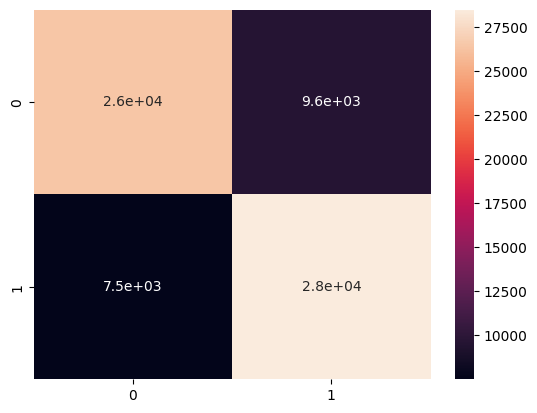

In [101]:
#matriz de confusão
sns.heatmap(cm, annot=True)

In [102]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

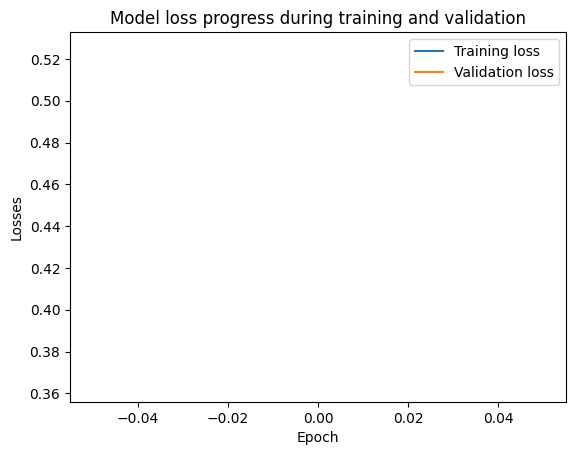

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

plt.show()

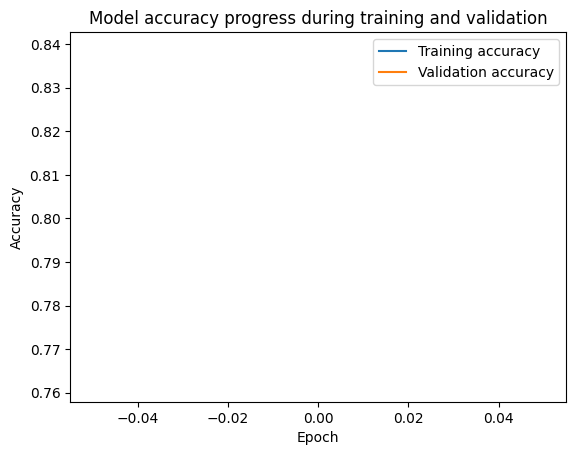

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

plt.show()

## Previsões

In [91]:
#palavra que vai ser passada
text = 'i hate you'
#necessario fazer o encode para passar para o modelo
text = tokenizer.encode(text)
text

[271, 64, 3047]

In [92]:
#chamando o Dcnn convertendo o texto em um arry e passando para o objeto
Dcnn(np.array([text]), training=False).numpy()

array([[0.35580337]], dtype=float32)

In [93]:
#palavra que vai ser passada
text = 'i love you'
#necessario fazer o encode para passar para o modelo
text = tokenizer.encode(text)
text

[271, 13, 3047]

In [94]:
#chamando o Dcnn convertendo o texto em um arry e passando para o objeto
Dcnn(np.array([text]), training=False).numpy()

array([[0.8732561]], dtype=float32)